In [51]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier



X_full = filtered_gene_expr_binary.drop(columns=["RESPONSE"])  # expression data of Lapatinib-tested cell lines
y = filtered_gene_expr_binary["RESPONSE"].map({"Resistant": 0, "Sensitive": 1})      # 0 = Sensitive, 1 = Resistant


# Split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

# Features to try
feature_counts = [5, 10, 20, 50, 100]
results = []

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop over feature counts and models
for k in feature_counts:
    rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=k)
    rfe.fit(X_train_scaled, y_train)

    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    for name, model in models.items():
        try:
            model.fit(X_train_rfe, y_train)
            y_pred = model.predict(X_test_rfe)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
        except Exception as e:
            acc = f1 = np.nan

        results.append({
            "Model": name,
            "Features": k,
            "Accuracy": acc,
            "F1 Score": f1
        })

# Create DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by=["Features", "Model"], inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display
results_df.head(15)


C:\Users\dimim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dimim\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dimim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dimim\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dimim\anaco

,Model,Features,Accuracy,F1 Score
0,Logistic Regression,5,0.738095,0.710526
1,Logistic Regression (L1),5,0.726190,0.701299
2,MLP,5,0.678571,0.658228
3,Random Forest,5,0.666667,0.641026
4,SVM,5,0.678571,0.658228
5,XGBoost,5,0.666667,0.650000
6,Logistic Regression,10,0.714286,0.692308
7,Logistic Regression (L1),10,0.714286,0.692308
8,MLP,10,0.666667,0.658537
9,Random Forest,10,0.642857,0.594595


C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

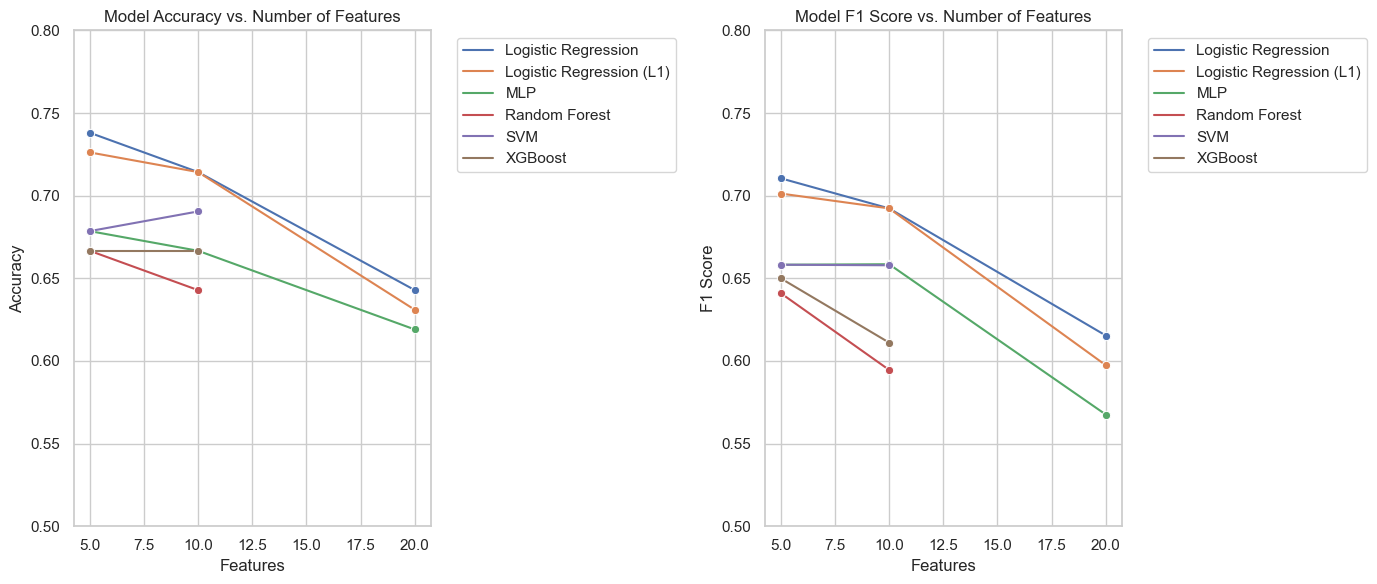

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample results manually input for visualization
data = {
    "Model": [
        "Logistic Regression", "Logistic Regression (L1)", "MLP", "Random Forest", "SVM", "XGBoost",
        "Logistic Regression", "Logistic Regression (L1)", "MLP", "Random Forest", "SVM", "XGBoost",
        "Logistic Regression", "Logistic Regression (L1)", "MLP"
    ],
    "Features": [5]*6 + [10]*6 + [20]*3,
    "Accuracy": [
        0.738095, 0.726190, 0.678571, 0.666667, 0.678571, 0.666667,
        0.714286, 0.714286, 0.666667, 0.642857, 0.690476, 0.666667,
        0.642857, 0.630952, 0.619048
    ],
    "F1 Score": [
        0.710526, 0.701299, 0.658228, 0.641026, 0.658228, 0.650000,
        0.692308, 0.692308, 0.658537, 0.594595, 0.657895, 0.611111,
        0.615385, 0.597403, 0.567568
    ]
}

results_df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
sns.lineplot(data=results_df, x="Features", y="Accuracy", hue="Model", marker="o")
plt.title("Model Accuracy vs. Number of Features")
plt.ylim(0.5, 0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot F1 Score
plt.subplot(1, 2, 2)
sns.lineplot(data=results_df, x="Features", y="F1 Score", hue="Model", marker="o")
plt.title("Model F1 Score vs. Number of Features")
plt.ylim(0.5, 0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


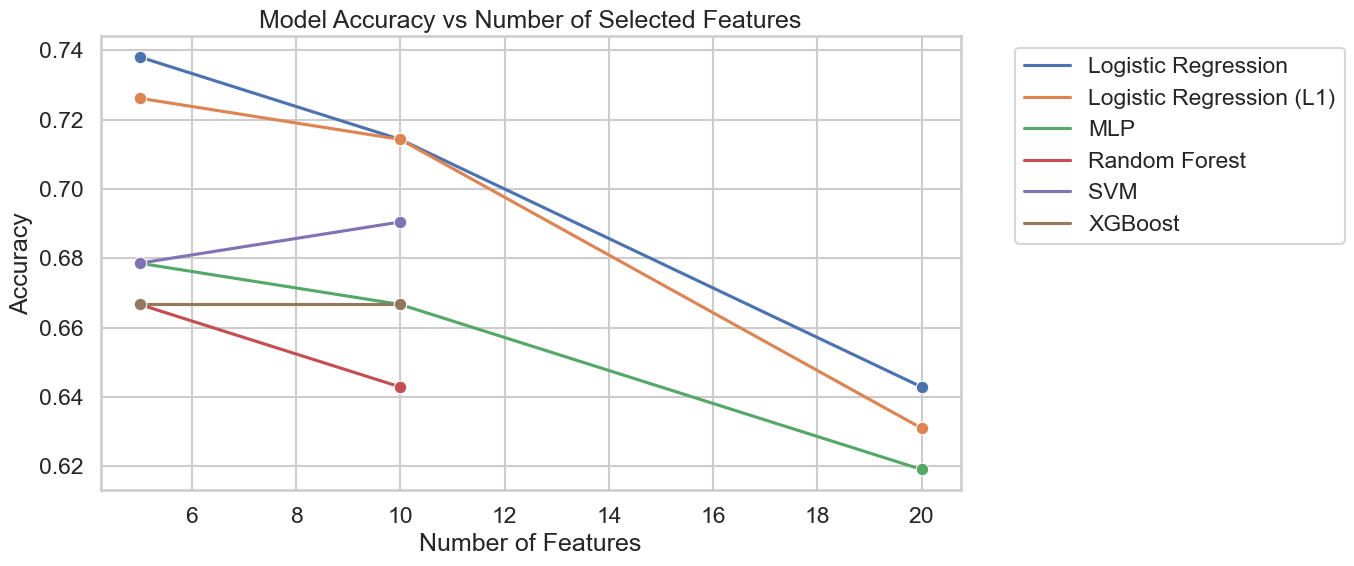

C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dimim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


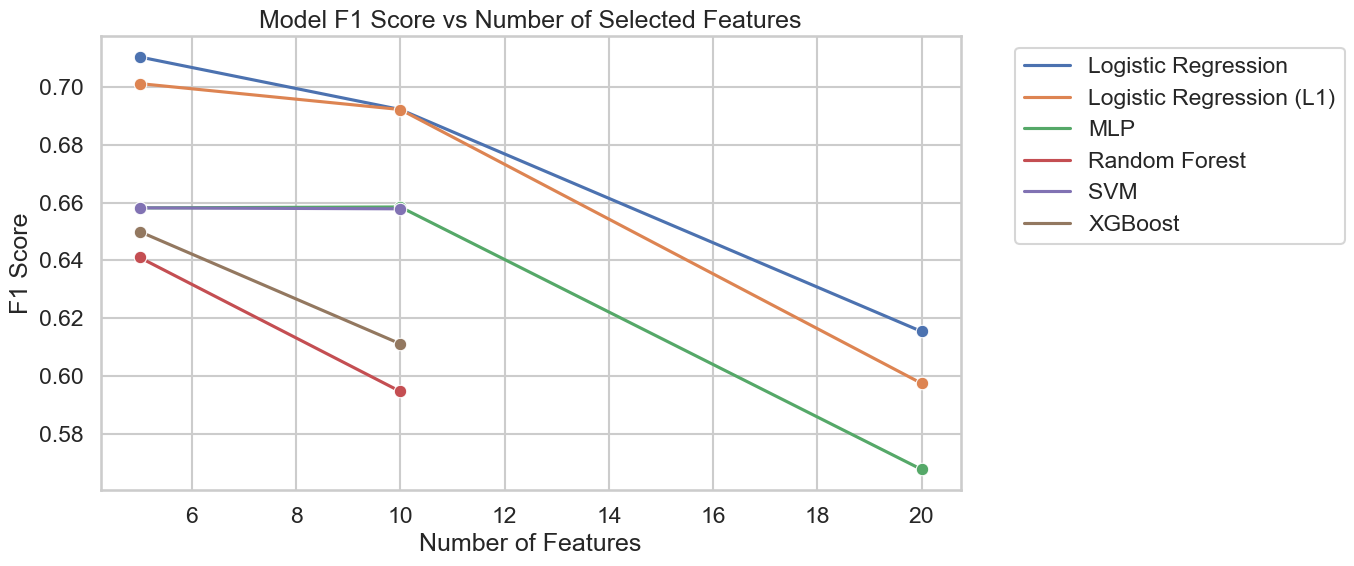

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid", context="talk")

# Accuracy plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=results_df, x="Features", y="Accuracy", hue="Model", marker="o")
plt.title("Model Accuracy vs Number of Selected Features")
plt.ylabel("Accuracy")
plt.xlabel("Number of Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# F1 Score plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=results_df, x="Features", y="F1 Score", hue="Model", marker="o")
plt.title("Model F1 Score vs Number of Selected Features")
plt.ylabel("F1 Score")
plt.xlabel("Number of Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


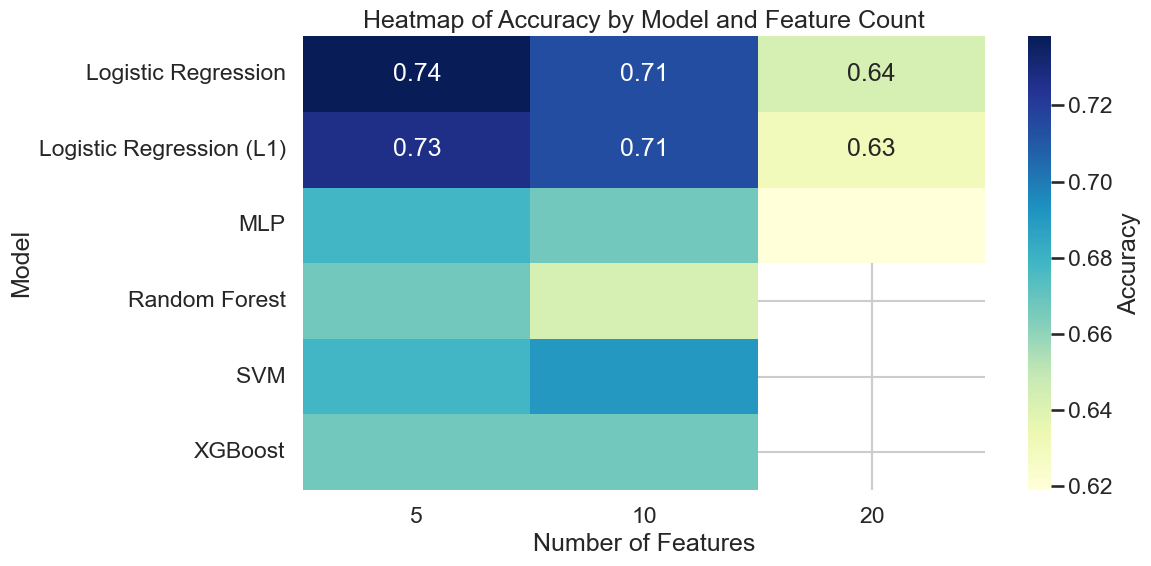

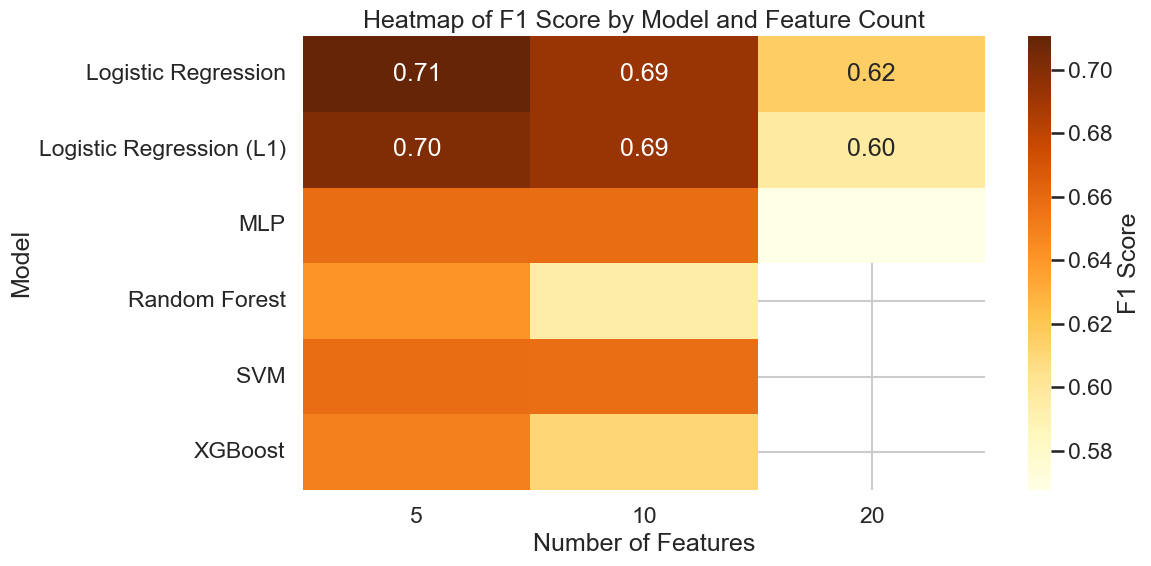

In [54]:
# Pivot for heatmaps
acc_pivot = results_df.pivot(index="Model", columns="Features", values="Accuracy")
f1_pivot = results_df.pivot(index="Model", columns="Features", values="F1 Score")

# Accuracy Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(acc_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.title("Heatmap of Accuracy by Model and Feature Count")
plt.xlabel("Number of Features")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# F1 Score Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(f1_pivot, annot=True, fmt=".2f", cmap="YlOrBr", cbar_kws={'label': 'F1 Score'})
plt.title("Heatmap of F1 Score by Model and Feature Count")
plt.xlabel("Number of Features")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


Top 10 genes contributing to PC1:
IKZF1 (10320)        0.099914
WAS (7454)           0.099160
NCKAP1L (3071)       0.098172
SASH3 (54440)        0.097128
ARHGAP30 (257106)    0.096953
CD53 (963)           0.096516
RASAL3 (64926)       0.095211
KLHL6 (89857)        0.094661
PTPN7 (5778)         0.093428
MAP4K1 (11184)       0.093092
Name: PC1, dtype: float64


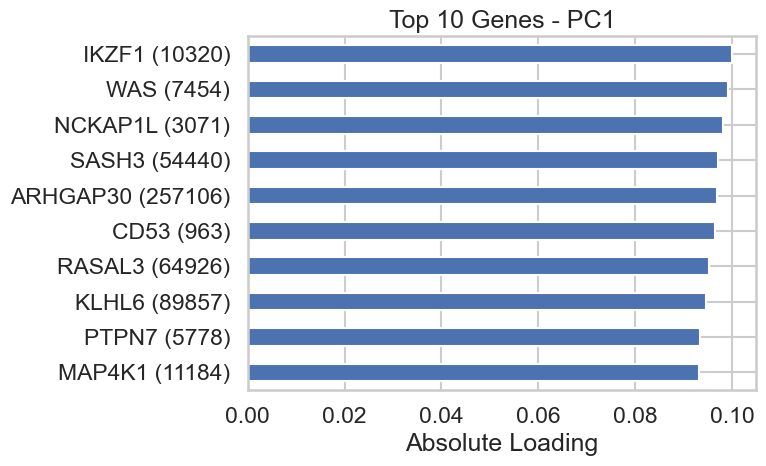

In [55]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Run PCA on scaled expression matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca.components_.T,
    index=X_full.columns,
    columns=["PC1", "PC2"]
)

# Top 10 genes contributing to PC1
top_genes_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(10)
print("Top 10 genes contributing to PC1:")
print(top_genes_pc1)

# Optional barplot
top_genes_pc1.plot(kind='barh', figsize=(8, 5), title="Top 10 Genes - PC1")
plt.xlabel("Absolute Loading")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [56]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [106]:
import mlflow
mlflow.set_tracking_uri("file:///C:/Users/dimim/mlruns")

mlflow.set_experiment("Lapatinib_Model_Comparison")


<Experiment: artifact_location='file:///C:/Users/dimim/mlruns/566491172214306233', creation_time=1750582753640, experiment_id='566491172214306233', last_update_time=1750582753640, lifecycle_stage='active', name='Lapatinib_Model_Comparison', tags={}>

In [108]:
mlflow.end_run()

In [92]:
from sklearn.metrics import roc_auc_score

# X_test is your test features
# model is your trained classifier

y_pred_prob = model.predict_proba(X_test)[:, 1]  # probability of positive class
y_pred = model.predict(X_test)  # predicted class labels

# Then calculate auc
auc = roc_auc_score(y_true, y_pred_prob)



In [109]:
import mlflow
mlflow.set_experiment("Lapatinib_Model_Comparison")


for _, row in results_df.iterrows():
    with mlflow.start_run(run_name=f"{row['Model']}_{row['Features']}features"):
        mlflow.log_param("Model", row["Model"])
        mlflow.log_param("Num_Features", row["Features"])
        mlflow.log_metric("Accuracy", accuracy_score(y_test, preds))
        mlflow.log_metric("F1_score", f1_score(y_test, preds))
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("F1_Score", f1)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("Error_Rate", error_rate)
        if auc is not None:
            mlflow.log_metric("ROC_AUC", auc)
        if logloss is not None:
            mlflow.log_metric("Log_Loss", logloss)


In [110]:
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd

client = MlflowClient()
experiment_name = "Lapatinib_Model_Comparison"
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment.experiment_id)

# Convert runs to a DataFrame
df = pd.DataFrame([{
    "run_id": r.info.run_id,
    "model_name": r.data.tags.get("mlflow.runName", r.info.run_id),
    **r.data.metrics
} for r in runs])

df = df.sort_values("Accuracy", ascending=False)  # Optional sort
display(df)


,run_id,model_name,Accuracy,Error_Rate,F1_score,Log_Loss,Precision,Recall,ROC_AUC,F1_Score,accuracy,f1_score
63,8af5578190d048e3a585f53f4df4bc79,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526,NaN,NaN
48,c1a3c1ce720f4f5f911d837575b09521,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526,NaN,NaN
62,8765c6b36ae9427eba14c847d8268433,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299,NaN,NaN
47,13f63dd0eb47484a80822e6aa2234fdb,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299,NaN,NaN
57,158a7454ec35477f99e7080e828797e8,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35,09168bacd64b4795bd84b3c14bbd5436,Logistic Regression (L1)_20features,0.630952,NaN,NaN,NaN,NaN,NaN,NaN,0.597403,NaN,NaN
49,3925aa1d20534a328a79df0e42d004ea,MLP_20features,0.619048,NaN,NaN,NaN,NaN,NaN,NaN,0.567568,NaN,NaN
34,30f7984342614ac9b025cad0bb18d47a,MLP_20features,0.619048,NaN,NaN,NaN,NaN,NaN,NaN,0.567568,NaN,NaN
64,0caafc9d42a34e7f803637a0330655d3,puzzled-conch-630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678571,0.597015


In [111]:
df_cleaned = df.sort_values(by="Accuracy", ascending=False).drop_duplicates(subset=["model_name"], keep="first")

In [112]:
display(df_cleaned)

,run_id,model_name,Accuracy,Error_Rate,F1_score,Log_Loss,Precision,Recall,ROC_AUC,F1_Score,accuracy,f1_score
63,8af5578190d048e3a585f53f4df4bc79,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526,NaN,NaN
62,8765c6b36ae9427eba14c847d8268433,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299,NaN,NaN
57,158a7454ec35477f99e7080e828797e8,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
56,ebee57cc17bb478c8ca21d1809b1ec47,Logistic Regression (L1)_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
11,6a350fae52dc48efba415313515ef351,Random Forest_5features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN,NaN,NaN
5,d90d2307df7b4b46b7a6608070be1102,Random Forest_10features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN,NaN,NaN
6,d80c53aaa13146b1a014fed3fa343a3a,MLP_10features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN,NaN,NaN
19,1836741b6c56463bb24f81dd6d776342,XGBoost_10features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN,NaN,NaN
10,ce565ccd62b148768480e16c396512b7,SVM_5features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN,NaN,NaN
16,1eb8958834604371bb21da777b9157a6,MLP_20features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN,NaN,NaN


In [113]:


df["Accuracy"] = df["Accuracy"].combine_first(df["accuracy"])
df["F1_Score"] = df["F1_Score"].combine_first(df["f1_score"])

df = df.drop(columns=["accuracy", "f1_score"])


In [114]:
display(df)


,run_id,model_name,Accuracy,Error_Rate,F1_score,Log_Loss,Precision,Recall,ROC_AUC,F1_Score
63,8af5578190d048e3a585f53f4df4bc79,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526
48,c1a3c1ce720f4f5f911d837575b09521,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526
62,8765c6b36ae9427eba14c847d8268433,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299
47,13f63dd0eb47484a80822e6aa2234fdb,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299
57,158a7454ec35477f99e7080e828797e8,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308
...,...,...,...,...,...,...,...,...,...,...
35,09168bacd64b4795bd84b3c14bbd5436,Logistic Regression (L1)_20features,0.630952,NaN,NaN,NaN,NaN,NaN,NaN,0.597403
49,3925aa1d20534a328a79df0e42d004ea,MLP_20features,0.619048,NaN,NaN,NaN,NaN,NaN,NaN,0.567568
34,30f7984342614ac9b025cad0bb18d47a,MLP_20features,0.619048,NaN,NaN,NaN,NaN,NaN,NaN,0.567568
64,0caafc9d42a34e7f803637a0330655d3,puzzled-conch-630,0.678571,NaN,NaN,NaN,NaN,NaN,NaN,0.597015


In [115]:
df_cleaned = df.sort_values(by="Accuracy", ascending=False).drop_duplicates(subset=["model_name"], keep="first")


In [116]:
display(df_cleaned)

,run_id,model_name,Accuracy,Error_Rate,F1_score,Log_Loss,Precision,Recall,ROC_AUC,F1_Score
63,8af5578190d048e3a585f53f4df4bc79,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526
62,8765c6b36ae9427eba14c847d8268433,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299
57,158a7454ec35477f99e7080e828797e8,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308
56,ebee57cc17bb478c8ca21d1809b1ec47,Logistic Regression (L1)_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308
11,6a350fae52dc48efba415313515ef351,Random Forest_5features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN
5,d90d2307df7b4b46b7a6608070be1102,Random Forest_10features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN
6,d80c53aaa13146b1a014fed3fa343a3a,MLP_10features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN
19,1836741b6c56463bb24f81dd6d776342,XGBoost_10features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN
32,5030e396f4fd4e1db91750e58613fd11,calm-moose-179,0.714286,0.285714,NaN,0.554754,0.714286,0.641026,0.790883,0.675676
16,1eb8958834604371bb21da777b9157a6,MLP_20features,0.714286,0.285714,0.675676,0.554754,0.714286,0.641026,0.790883,NaN


In [102]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, roc_auc_score

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # if model supports predict_proba

accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
logloss = log_loss(y_true, y_pred_prob)
auc = roc_auc_score(y_true, y_pred_prob)

# Then log all to mlflow or save in your results dataframe
mlflow.log_metric("Accuracy", accuracy)
mlflow.log_metric("Recall", recall)
mlflow.log_metric("Precision", precision)
mlflow.log_metric("F1_score", f1)
mlflow.log_metric("Log_Loss", logloss)
mlflow.log_metric("ROC_AUC", auc)


In [103]:
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd

client = MlflowClient()
experiment_name = "Lapatinib_Model_Comparison"
experiment = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment.experiment_id)

# Convert runs to a DataFrame
df = pd.DataFrame([{
    "run_id": r.info.run_id,
    "model_name": r.data.tags.get("mlflow.runName", r.info.run_id),
    **r.data.metrics
} for r in runs])

df = df.sort_values("Accuracy", ascending=False)  # Optional sort
display(df)

,run_id,model_name,Accuracy,F1_score,Log_Loss,Precision,Recall,ROC_AUC,Error_Rate,F1_Score,accuracy,f1_score
48,8af5578190d048e3a585f53f4df4bc79,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526,NaN,NaN
33,c1a3c1ce720f4f5f911d837575b09521,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526,NaN,NaN
47,8765c6b36ae9427eba14c847d8268433,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299,NaN,NaN
32,13f63dd0eb47484a80822e6aa2234fdb,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299,NaN,NaN
42,158a7454ec35477f99e7080e828797e8,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
41,ebee57cc17bb478c8ca21d1809b1ec47,Logistic Regression (L1)_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
27,9edc056a51ed4c7bb5f6307f5c478f1c,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
26,5a8c8d7aa5094edc806f7c4c24babe96,Logistic Regression (L1)_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN
14,22d197926b044314bccb6bc3dd77ac91,Logistic Regression (L1)_5features,0.714286,0.675676,0.554754,0.714286,0.641026,0.790883,0.285714,NaN,NaN,NaN
1,1eb8958834604371bb21da777b9157a6,MLP_20features,0.714286,0.675676,0.554754,0.714286,0.641026,0.790883,0.285714,NaN,NaN,NaN


In [99]:
df_cleaned = df_cleaned.dropna(subset=["Accuracy", "F1_Score"])
display(df_cleaned)

,run_id,model_name,Accuracy,Error_Rate,F1_score,Log_Loss,Precision,Recall,ROC_AUC,F1_Score
47,8af5578190d048e3a585f53f4df4bc79,Logistic Regression_5features,0.738095,NaN,NaN,NaN,NaN,NaN,NaN,0.710526
46,8765c6b36ae9427eba14c847d8268433,Logistic Regression (L1)_5features,0.726190,NaN,NaN,NaN,NaN,NaN,NaN,0.701299
41,158a7454ec35477f99e7080e828797e8,Logistic Regression_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308
40,ebee57cc17bb478c8ca21d1809b1ec47,Logistic Regression (L1)_10features,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,0.692308
16,5030e396f4fd4e1db91750e58613fd11,calm-moose-179,0.714286,0.285714,NaN,0.554754,0.714286,0.641026,0.790883,0.675676
17,bb885e4bfda04e9d92e3845c92267e92,treasured-foal-748,0.714286,0.285714,NaN,0.554754,0.714286,0.641026,0.790883,0.675676
48,0caafc9d42a34e7f803637a0330655d3,puzzled-conch-630,0.678571,NaN,NaN,NaN,NaN,NaN,NaN,0.597015
49,7e80502ea30d49088f3452b55b5b4000,fortunate-bird-973,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.621622


In [77]:
df_cleaned = df_cleaned.reset_index(drop=True)


In [79]:
y_true = y_test

# Use the model to predict labels and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1


In [80]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, log_loss
)

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_proba)
logloss = log_loss(y_true, y_proba)
error_rate = 1 - acc

import mlflow

with mlflow.start_run():
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("F1_Score", f1)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("ROC_AUC", roc_auc)
    mlflow.log_metric("Log_Loss", logloss)
    mlflow.log_metric("Error_Rate", error_rate)


In [81]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, log_loss
)

# y_true: true labels
# y_pred: predicted class labels
# y_proba: predicted probabilities (needed for AUC and log loss)

# Compute metrics
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_proba)
logloss = log_loss(y_true, y_proba)
error_rate = 1 - acc

# Log to MLflow
mlflow.log_metric("Accuracy", acc)
mlflow.log_metric("F1_Score", f1)
mlflow.log_metric("Precision", precision)
mlflow.log_metric("Recall", recall)
mlflow.log_metric("ROC_AUC", roc_auc)
mlflow.log_metric("Log_Loss", logloss)
mlflow.log_metric("Error_Rate", error_rate)


In [119]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Prepare data
X_full = filtered_gene_expr_binary.drop(columns=["RESPONSE"])
y = filtered_gene_expr_binary["RESPONSE"].map({"Resistant": 0, "Sensitive": 1})

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature sets
feature_counts = [5, 10, 20, 50, 100]

# MLflow tracking
mlflow.set_experiment("Lapatinib Sensitivity Modeling")

for k in feature_counts:
    # RFE Feature Selection
    rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=k)
    rfe.fit(X_train_scaled, y_train)

    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    for name, model in models.items():
        with mlflow.start_run(run_name=f"{name}_{k}features"):
            try:
                model.fit(X_train_rfe, y_train)
                y_pred = model.predict(X_test_rfe)
                y_proba = model.predict_proba(X_test_rfe)[:, 1] if hasattr(model, "predict_proba") else None

                acc = accuracy_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
                cm = confusion_matrix(y_test, y_pred)

                # Log params and metrics
                mlflow.log_param("Model", name)
                mlflow.log_param("Num_Features", k)
                mlflow.log_metric("Accuracy", acc)
                mlflow.log_metric("F1_Score", f1)
                mlflow.log_metric("AUC", auc)

                
                cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
                cm_path = f"conf_matrix_{name}_{k}features.csv"
                cm_df.to_csv(cm_path)
                mlflow.sklearn.log_model(model, name="model") 


                # Log model itself
                mlflow.sklearn.log_model(model, "model")

            except Exception as e:
                mlflow.log_param("Model", name)
                mlflow.log_param("Num_Features", k)
                mlflow.log_param("Error", str(e))


2025/06/22 17:58:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/22 17:58:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/22 17:58:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/22 17:58:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/22 17:58:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/22 17:58:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
20

In [123]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import xgboost as xgb
import pandas as pd

# Scale data for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models (use scaled data where appropriate)
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), X_train, X_test),
    "Random Forest": (RandomForestClassifier(n_estimators=100), X_train, X_test),
    "SVM": (SVC(probability=True), X_train_scaled, X_test_scaled),
    "MLP": (MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000), X_train_scaled, X_test_scaled),
    "XGBoost": (xgb.XGBClassifier(eval_metric='logloss', verbosity=0), X_train, X_test)
}

mlflow.set_experiment("lapatinib_classification")

# Loop through each model
for name, (model, Xtr, Xte) in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(Xtr, y_train)
        y_pred = model.predict(Xte)
        y_proba = model.predict_proba(Xte)[:, 1] if hasattr(model, "predict_proba") else None

        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        # Log to MLflow
        mlflow.log_param("model_type", name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        if auc is not None:
            mlflow.log_metric("roc_auc", auc)

        # Log the model with input example
        input_example = pd.DataFrame(Xtr[:5]) if not isinstance(Xtr, pd.DataFrame) else Xtr[:5]
        mlflow.sklearn.log_model(
            model,
            name="model",
            input_example=input_example
        )


2025/06/23 11:54:23 INFO mlflow.tracking.fluent: Experiment with name 'lapatinib_classification' does not exist. Creating a new experiment.
C:\Users\dimim\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\dimim\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\dimim\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\dimim\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\dimim\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [124]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, precision_score,
    recall_score, confusion_matrix, roc_curve
)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Mock input data to simulate the real environment (replace with your actual X_train, y_train, etc.)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=300, n_features=50, n_informative=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

feature_counts = [10, 20]
mlflow.set_experiment("lapatinib_classification_with_feature_selection")

def log_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} - Confusion Matrix")
    filepath = f"{model_name}_confusion_matrix.png"
    plt.savefig(filepath)
    plt.close()
    mlflow.log_artifact(filepath)

def log_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    filepath = f"{model_name}_roc_curve.png"
    plt.savefig(filepath)
    plt.close()
    mlflow.log_artifact(filepath)

for feature_count in feature_counts:
    for name, model in models.items():
        with mlflow.start_run(run_name=f"{name} - top{feature_count}"):
            # Build pipeline
            select = SelectKBest(score_func=f_classif, k=feature_count)
            clf = Pipeline([
                ('select', select),
                ('scale', StandardScaler()),
                ('clf', model)
            ])
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf.named_steps['clf'], "predict_proba") else None

            # Compute metrics
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

            # Log everything
            mlflow.log_param("model", name)
            mlflow.log_param("features", feature_count)
            mlflow.log_metric("accuracy", acc)
            mlflow.log_metric("f1_score", f1)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            if auc is not None:
                mlflow.log_metric("roc_auc", auc)

            log_confusion_matrix(y_test, y_pred, f"{name}_top{feature_count}")
            if y_proba is not None:
                log_roc_curve(y_test, y_proba, f"{name}_top{feature_count}")

            mlflow.sklearn.log_model(clf, name="model")



2025/06/23 12:24:56 INFO mlflow.tracking.fluent: Experiment with name 'lapatinib_classification_with_feature_selection' does not exist. Creating a new experiment.
2025/06/23 12:25:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/23 12:25:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/23 12:25:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/23 12:25:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\dimim\anaconda3\Lib\site-packages\xgboost\tr

In [126]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

# Define feature counts
feature_counts = [10, 20]

# Start MLflow experiment
mlflow.set_experiment("Model Comparison")

for k in feature_counts:
    # Feature selection
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)

    for model_name, model in models.items():
        with mlflow.start_run(run_name=f"{model_name} - {k} features"):
            # Train
            model.fit(X_train_k, y_train)
            y_pred = model.predict(X_test_k)
            y_prob = model.predict_proba(X_test_k)[:, 1] if hasattr(model, "predict_proba") else None

            # Metrics
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

            # Log model and metrics
            mlflow.log_param("Model", model_name)
            mlflow.log_param("Feature_Count", k)
            mlflow.log_metric("Accuracy", acc)
            mlflow.log_metric("Precision", prec)
            mlflow.log_metric("Recall", rec)
            mlflow.log_metric("F1_Score", f1)
            if auc is not None:
                mlflow.log_metric("AUC", auc)
            mlflow.sklearn.log_model(model, "model")


2025/06/24 10:44:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/24 10:44:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/24 10:44:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/24 10:44:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/24 10:44:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/24 10:44:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/24 10:44:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 